In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import sys

In [2]:
print(sys.version)
print(np.__version__)
print(cv2.__version__)

3.8.5 (default, Sep  4 2020, 02:22:02) 
[Clang 10.0.0 ]
1.19.2
4.5.1


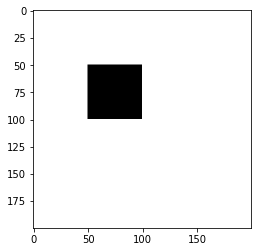

In [3]:
gray = np.full((200,200), 255, dtype = np.uint8)
gray[50:100, 50:100] = 0

plt.imshow(gray, cmap='gray')
plt.show()

## Gradient

In [4]:
# gradX = cv2.Laplacian(gray, cv2.CV_8U)
gradX = cv2.Sobel(gray, cv2.CV_64F, dx=1, dy=0, ksize=3)
gradY = cv2.Sobel(gray, cv2.CV_64F, dx=0, dy=1, ksize=3)
gradX += gradY

In [5]:
gradX = np.abs(gradX)

In [6]:
(minVal, maxVal) = (np.min(gradX), np.max(gradX)) 
if maxVal - minVal > 0:
    gradX = (255 * ((gradX - minVal) / float(maxVal - minVal))).astype("uint8")
else:
    gradX  = np.zeros(gray.shape, dtype = "uint8")

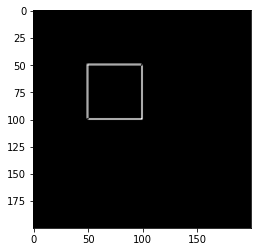

In [7]:
plt.imshow(gradX, cmap='gray')
plt.show()

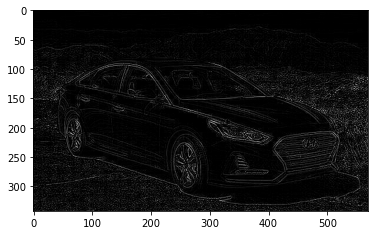

In [8]:
car_img = cv2.imread('assets/car.jpg', 0)
gradX = cv2.Laplacian(car_img, cv2.CV_8U)
plt.imshow(gradX, cmap='gray')
plt.show()

## Practice text detection

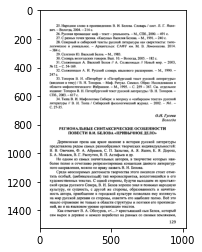

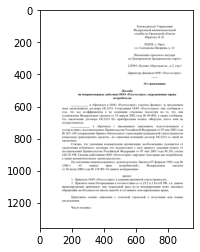

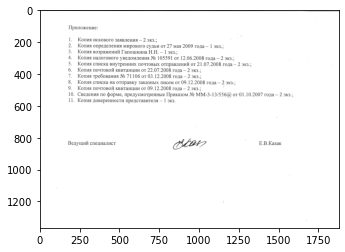

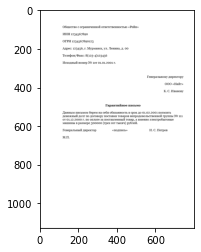

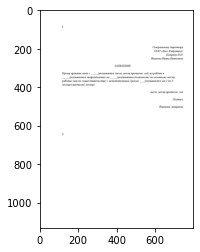

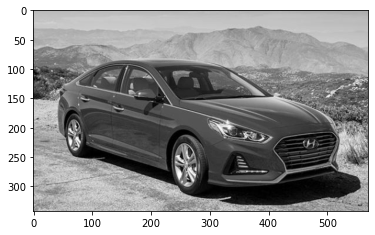

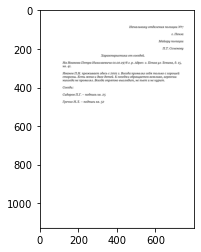

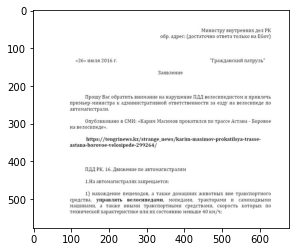

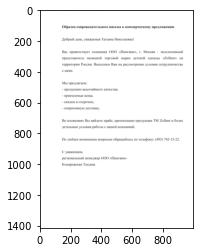

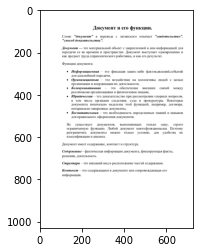

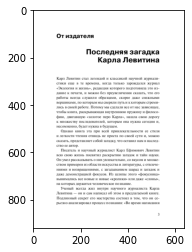

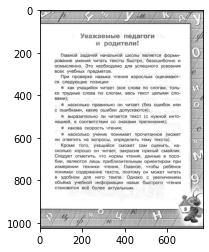

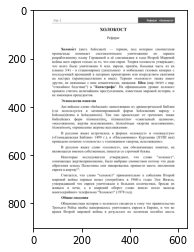

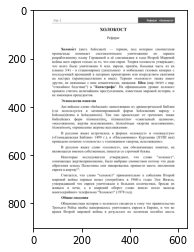

In [9]:
for root, dirs, files in os.walk("assets/"):
    for file in files:
        imagepath = os.path.join(root, file)
        if file.endswith('.jpg'):
                
            img = cv2.imread(imagepath, 0)

            plt.imshow(img, cmap='gray')
            plt.show()

In [10]:
img = cv2.imread("assets/1.jpg")
vis = img.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [11]:
gradX = cv2.Laplacian(gray, cv2.CV_8U)

In [12]:
blur = cv2.blur(gradX, (21, 1))

In [13]:
ret, th = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

In [14]:
kernel = np.ones((1, 15), np.uint8)
opening = cv2.morphologyEx(th, cv2.MORPH_OPEN, kernel)

In [15]:
contours, hierarchy = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
img_cnts = cv2.drawContours(vis, contours, -1, (0,255,0), 1)

In [16]:
boxRegions = []
hsum = 0
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    hsum += h
    boxRegions.append((x, y, w, h))

In [17]:
meanHeight = hsum / float(len(contours))

In [18]:
textRegions = []
for box in boxRegions:
    if box[3] > meanHeight:
        x,y,w,h = box
        textRegions.append((x,y, x+w,y+h))
        cv2.rectangle(vis,(x,y),(x+w,y+h),(0,0,255),1)

In [19]:
regionImgs = []
for textRegion in textRegions:
    x1,y1,x2,y2 = textRegion
    regionImgs.append(img[y1:y2,x1:x2])

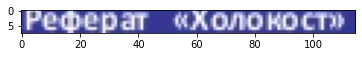

In [20]:
plt.imshow(regionImgs[-1], cmap='gray')
plt.show()

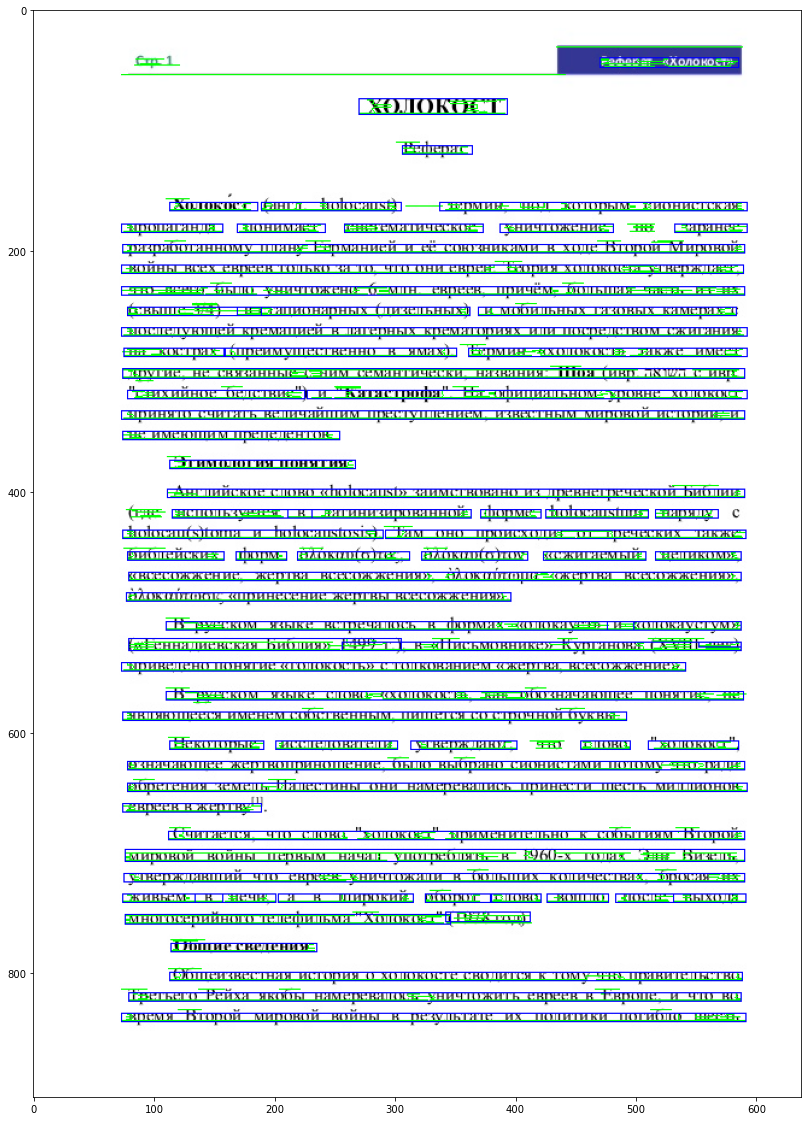

In [21]:
fig, ax = plt.subplots(figsize=(18, 20))
ax.imshow(vis, cmap='gray')
plt.show()